In [1]:
# Assignment 5 for Professor Wang's PM Data Science class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# 1. Load the titanic data set
titanic_data = pd.read_csv("../titanic_data.csv")

In [3]:
# 2. Do a QCut on Age
pd.qcut(titanic_data['Age'], 4)

0       (20.125, 28.0]
1         (28.0, 38.0]
2       (20.125, 28.0]
3         (28.0, 38.0]
4         (28.0, 38.0]
            ...       
886     (20.125, 28.0]
887    (0.419, 20.125]
888                NaN
889     (20.125, 28.0]
890       (28.0, 38.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.419, 20.125] < (20.125, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

In [4]:
# 3. Do a Cut on Age
pd.cut(titanic_data['Age'], 4)

0      (20.315, 40.21]
1      (20.315, 40.21]
2      (20.315, 40.21]
3      (20.315, 40.21]
4      (20.315, 40.21]
            ...       
886    (20.315, 40.21]
887     (0.34, 20.315]
888                NaN
889    (20.315, 40.21]
890    (20.315, 40.21]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.34, 20.315] < (20.315, 40.21] < (40.21, 60.105] < (60.105, 80.0]]

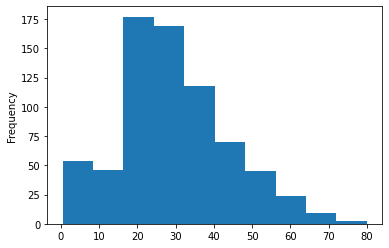

In [5]:
# 4. Plot a histogram on Age data
titanic_data['Age'].plot.hist()

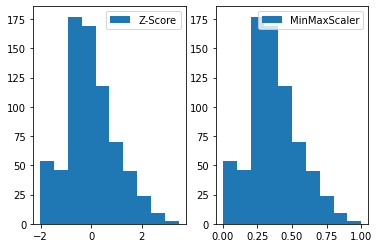

In [6]:
# 5. Use sklearn to normalize the Age data and make a new histogram
# Use both z-score normalization and minmax normalization

# zscore
zscore = stats.zscore(np.array(titanic_data['Age'].dropna()))

# MinMax
minmax = MinMaxScaler().fit_transform(np.array(titanic_data['Age'].dropna()).reshape(-1,1))

fig, axs = plt.subplots(1,2)

axs[0].hist(zscore, label='Z-Score')
axs[1].hist(minmax, label='MinMaxScaler')

axs[0].legend()
axs[1].legend()

plt.show()

In [10]:
# 6. Use groupby between Survived and Age based on average age
titanic_data.groupby(by=['Survived'])[['Age']].mean()

Age
Survived           
0         30.626179
1         28.343690

In [9]:
# 7. Using groupby and aggregate data, group by Sex and aggregate average Fare, and average Age
titanic_data.groupby(by=['Sex'])[['Fare','Age']].mean()

Fare        Age
Sex                         
female  44.479818  27.915709
male    25.523893  30.726645